In [13]:
#basicos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from  scipy import stats
areaCapacitor = 0.0531 #m2
cMedida = 218 #nF 
erroC = 2 #nF

0.9711927350670669


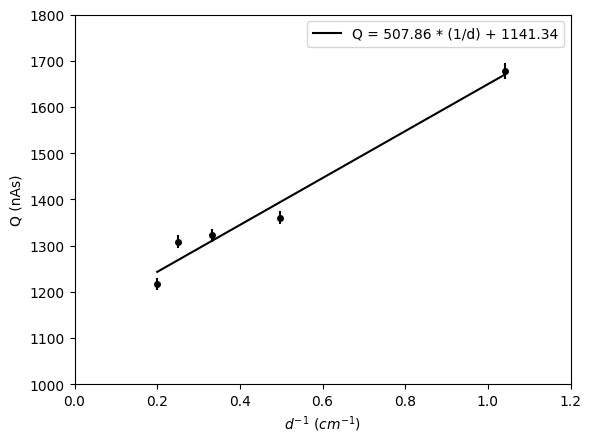

In [44]:
# 1 parte: relação distancia com o potencial 
dist = np.array([9.6, 20.1, 30, 40, 50])/10 #cm
errodist = np.ones(5)*0.0025 #+- cm
uMedido = np.array([7.697, 6.241, 6.066, 6.001, 5.583]) #V

# processamento
qMedido = uMedido * cMedida
erroDInv = errodist*dist**(-2)
erroUMedido = uMedido*0.005+2*0.001 # 0.5% + 2D
erroQMedido = (erroUMedido**2 * cMedida**2 + erroC**2 * uMedido**2)**(1/2)

dadosDist = pd.DataFrame(np.array([dist,   errodist,   1/dist,erroDInv,   uMedido, erroUMedido, qMedido, erroQMedido ]).T,
        columns=['dist(cm)', 'erroDist(cm)', '1/dist(cm^-1)','erroDInv(1/cm)', 'uMedido(V)','erroUMedido', 'qMedido (nAs)', 'erroQMedido(nAs)'])

slope, intercept, r, p, std_err = stats.linregress(1/dist, qMedido)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, 1/dist))

plt.figure()
#plt.plot(1/dist , qMedido, 'o', color= "black")
plt.errorbar(1/dist , qMedido, xerr=erroDInv, yerr=erroQMedido, fmt ='o', color= "black", ms=4) 
plt.xlim(0, 1.2)
plt.ylim(1000, 1800)
plt.plot(1/dist, mymodel, label= "Q = {} * (1/d) + {}".format(round(slope,2), round(intercept,2)), color= "black")
plt.legend()
plt.xlabel('$d^{-1}$ ($cm^{-1}$)')
plt.ylabel('Q (nAs)')
dadosDist
print(r**2)

AR 1.0527848135593223e-10 erro+- 3.146011741520725e-12
plastico 8.509734689265537e-11 erro+- 4.108427698506113e-12


,uAplicado(kV),uAr(V),erroUAr(V),qAr(nAs),erroQAr(nAs),uPlastico(V),erroUPlastico(V),qPlastico(nAs),erroQPlastico(nAs)
0,0.5,1.823,0.011115,397.414,4.377737,1.713,0.010565,373.434,4.128204
1,1.0,2.949,0.016745,642.882,6.936274,2.703,0.015515,589.254,6.376879
2,1.5,4.468,0.024340,974.024,10.392642,3.602,0.020010,785.236,8.421771
3,2.0,5.861,0.031305,1277.698,13.563884,4.413,0.024065,962.034,10.267452
4,2.5,7.192,0.037960,1567.856,16.594569,5.909,0.031545,1288.162,13.673172
5,3.0,8.157,0.042785,1778.226,18.792071,7.030,0.037150,1532.540,16.225675


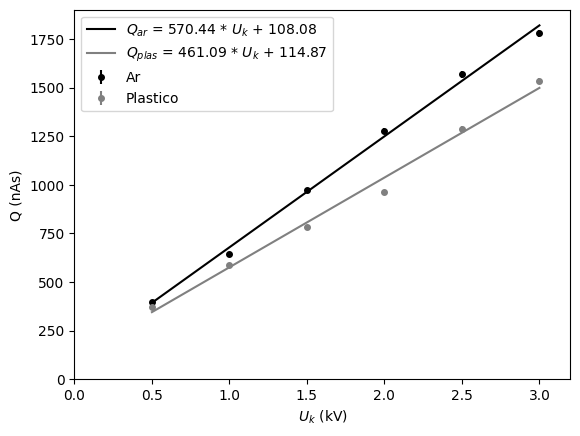

In [42]:
# 2 parte: constante dielétrica dos materiais. 
uAplicado = np.array([0.5, 1, 1.5, 2, 2.5, 3])
uAr = np.array([1.823, 2.949, 4.468, 5.861, 7.192, 8.157])
uPlastico = np.array([1.713, 2.703, 3.602, 4.413, 5.909, 7.030])
dsep = 9.8 *10**(-3) #m 
erroDSep =  0.025 *10**(-3) #m

#processamento
erroUAr = uAr*0.005+2*0.001
erroUPlastico = uPlastico*0.005+2*0.001

qAr = uAr * cMedida
erroQAr = (erroUAr**2 * cMedida**2 + erroC**2 * uAr**2)**(1/2)
qPlastico = uPlastico * cMedida
erroQPlastico = (erroUPlastico**2 * cMedida**2 + erroC**2 * uPlastico**2)**(1/2)


slopeAr, interceptAr, rAr, pAr, std_errAr = stats.linregress(uAplicado, qAr)
slopePlastico, interceptPlastico, rPlastico, pPlastico, std_errPlastico = stats.linregress(uAplicado, qPlastico)
def myfunc(x):
  return slopeAr * x + interceptAr
modelAr = list(map(myfunc, uAplicado))
def myfunc(x):
  return slopePlastico * x + interceptPlastico
modelPlastico = list(map(myfunc, uAplicado))

plt.errorbar(uAplicado , qAr, yerr=erroQAr, fmt ='o', color= "black", ms=4, label= "Ar") 
plt.plot(uAplicado, modelAr, label= "$Q_{ar}$"+" = {} * $U_k$ + {}".format(round(slopeAr,2), round(interceptAr,2)), color= "black")
plt.errorbar(uAplicado , qPlastico, yerr=erroQPlastico, fmt ='o', color= "gray", ms=4, label= "Plastico") 
plt.legend()
plt.xlim(0, 3.2)
plt.ylim(0, 1900)
plt.plot(uAplicado, modelPlastico, label= "$Q_{plas}$"+" = {} * $U_k$ + {}".format(round(slopePlastico,2), round(interceptPlastico,2)), color= "grey")
plt.legend()
plt.xlabel('$U_k$ (kV)')
plt.ylabel('Q (nAs)')
print("AR",10**(-12)*slopeAr*dsep/areaCapacitor,'erro+-', ((std_errAr*10**(-12))**2 * dsep**2 / areaCapacitor**2 + erroDSep**2 * (slopeAr*10**(-12))**2/areaCapacitor**2)**(1/2))
print('plastico',10**(-12)*slopePlastico*dsep/areaCapacitor,'erro+-', ((std_errPlastico*10**(-12))**2 * dsep**2 / areaCapacitor**2 + erroDSep**2 * (slopePlastico*10**(-12))**2/areaCapacitor**2)**(1/2))

dadosE0 = pd.DataFrame(np.array([uAplicado, uAr, erroUAr, qAr, erroQAr, uPlastico, erroUPlastico, qPlastico, erroQPlastico ]).T,
        columns=['uAplicado(kV)', 'uAr(V)', 'erroUAr(V)','qAr(nAs)', 'erroQAr(nAs)', 'uPlastico(V)', 'erroUPlastico(V)', 'qPlastico(nAs)','erroQPlastico(nAs)' ])
dadosE0